In [10]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile

In [11]:
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.image import img_to_array

In [12]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
path = '/content/gdrive/MyDrive/Material.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

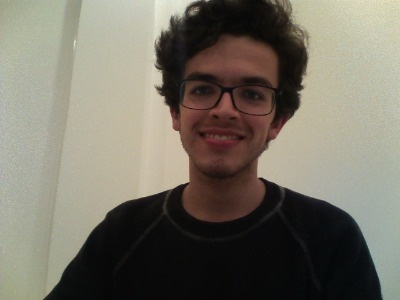

In [17]:
imagem = cv2.imread('Material/testes/teste_gabriel.png')
cv2_imshow(imagem)

In [19]:
cascade_faces = 'Material/haarcascade_frontalface_default.xml'
caminho_modelo = 'Material/modelo_01_expressoes.h5'
face_detection = cv2.CascadeClassifier(cascade_faces)
modelo = load_model(caminho_modelo, compile=False)
expressoes = ['Raiva', 'Nojo', 'Medo', 'Feliz', 'Triste', 'Surpreso', 'Neutro']

In [94]:
original = imagem.copy()
faces = face_detection.detectMultiScale(original, scaleFactor=1.1, minNeighbors=3, minSize=(20,20))

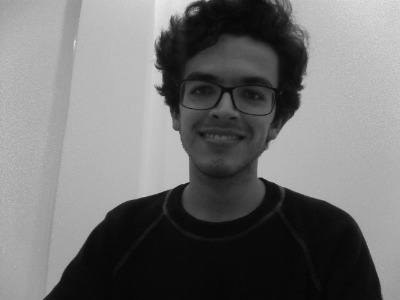

In [23]:
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(cinza)

In [25]:
roi = cinza[40:40 + 128, 162:162 + 128]

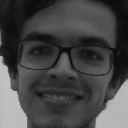

In [26]:
cv2_imshow(roi)

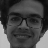

In [29]:
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [30]:
roi.dtype

dtype('uint8')

In [31]:
roi = roi.astype('float')

In [34]:
roi = roi / 255

In [36]:
roi = img_to_array(roi)

In [38]:
roi = np.expand_dims(roi, axis=0)

In [40]:
roi.shape

(1, 48, 48, 1)

In [42]:
preds = modelo.predict(roi)[0]

1/1 [==============================] - 0s 95ms/step


In [43]:
preds

array([1.6802143e-05, 5.7679888e-09, 1.1206589e-05, 9.9066460e-01,
       1.8033788e-05, 1.8518298e-05, 9.2708254e-03], dtype=float32)

In [44]:
emotion_probability = np.max(preds)

In [48]:
label = expressoes[preds.argmax()]
label

'Feliz'

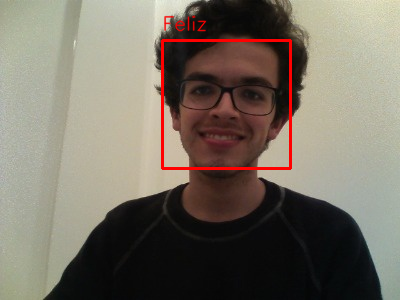

In [95]:
cv2.putText(original, label, (162, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 250), 1, cv2.LINE_AA)
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2)
cv2_imshow(original)

In [63]:
probabilidades = np.ones((250, 300, 3), dtype='uint8') * 255

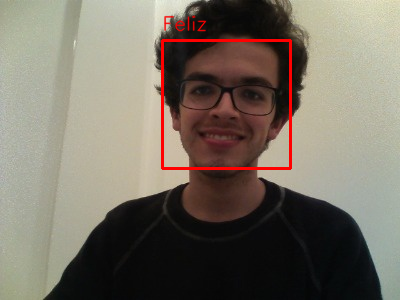

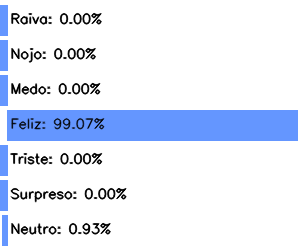

In [96]:
cv2_imshow(original)

if len(faces) == 1:
  for(i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
    text = '{}: {:.2f}%'.format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (300, 150, 100), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)

cv2_imshow(probabilidades)